In [1]:
import pandas as pd

pd.set_option('display.max_columns', 100)

df_mod = pd.read_parquet('../../data/model_data/model_data_single_output.parquet')

df_mod = df_mod.loc[df_mod['Position'] == 'RB', :].reset_index(drop=True)

df_mod

,Season,Week,Name,Position,Team,Fantasy Points,Rank,Position Rank,Adjusted Passing Yards Projection,Adjusted Passing Touchdowns Projection,Adjusted Interceptions Projection,Adjusted Rushing Yards Projection,Adjusted Receiving Yards Projection,Adjusted Receptions Projection,Anytime Touchdown Probability,Location,Team Projected Score,Opponent Projected Score
0,2020,1,christian mccaffrey,RB,CAR,26.9,3.0,1,NaN,NaN,NaN,73.512870,51.488656,6.544513,0.652778,1.0,22.50,25.50
1,2020,1,ezekiel elliott,RB,DAL,26.2,16.0,2,NaN,NaN,NaN,81.517442,29.500000,3.574315,0.619772,-1.0,25.50,26.50
2,2020,1,dalvin cook,RB,MIN,17.3,20.0,3,NaN,NaN,NaN,74.500000,28.500000,3.544513,0.579832,1.0,23.00,21.50
3,2020,1,josh jacobs,RB,LV,33.9,22.0,4,NaN,NaN,NaN,79.500000,16.511344,2.477273,0.607843,-1.0,25.50,22.50
4,2020,1,saquon barkley,RB,NYG,9.6,24.0,5,NaN,NaN,NaN,72.500000,33.500000,3.471510,0.523810,1.0,19.00,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009,2023,17,matt breida,RB,NYG,0.0,207.0,63,NaN,NaN,NaN,NaN,NaN,NaN,0.125000,1.0,18.75,24.75
4010,2023,17,latavius murray,RB,BUF,0.0,224.0,65,NaN,NaN,NaN,NaN,NaN,NaN,0.153846,1.0,27.25,12.75
4011,2023,17,trey sermon,RB,IND,5.1,228.0,67,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,1.0,23.00,19.50
4012,2023,17,deuce vaughn,RB,DAL,1.7,254.0,77,NaN,NaN,NaN,9.494463,NaN,NaN,0.190476,1.0,29.00,24.50


In [2]:
X = df_mod[[
    'Rank',
    'Position Rank',
    'Location',
    'Team Projected Score',
    'Opponent Projected Score',
    'Adjusted Receptions Projection',
    'Adjusted Receiving Yards Projection',
    'Adjusted Rushing Yards Projection',
    'Anytime Touchdown Probability',
]].copy()

X

,Rank,Position Rank,Location,Team Projected Score,Opponent Projected Score,Adjusted Receptions Projection,Adjusted Receiving Yards Projection,Adjusted Rushing Yards Projection,Anytime Touchdown Probability
0,3.0,1,1.0,22.50,25.50,6.544513,51.488656,73.512870,0.652778
1,16.0,2,-1.0,25.50,26.50,3.574315,29.500000,81.517442,0.619772
2,20.0,3,1.0,23.00,21.50,3.544513,28.500000,74.500000,0.579832
3,22.0,4,-1.0,25.50,22.50,2.477273,16.511344,79.500000,0.607843
4,24.0,5,1.0,19.00,25.00,3.471510,33.500000,72.500000,0.523810
...,...,...,...,...,...,...,...,...,...
4009,207.0,63,1.0,18.75,24.75,NaN,NaN,NaN,0.125000
4010,224.0,65,1.0,27.25,12.75,NaN,NaN,NaN,0.153846
4011,228.0,67,1.0,23.00,19.50,NaN,NaN,NaN,0.200000
4012,254.0,77,1.0,29.00,24.50,NaN,NaN,9.494463,0.190476


In [3]:
y = df_mod['Fantasy Points'].copy()

y

0       26.9
1       26.2
2       17.3
3       33.9
4        9.6
        ... 
4009     0.0
4010     0.0
4011     5.1
4012     1.7
4013     0.0
Name: Fantasy Points, Length: 4014, dtype: float64

In [4]:
groups = df_mod['Season'].astype(str) + ' Week ' + df_mod['Week'].astype(str)

groups

0        2020 Week 1
1        2020 Week 1
2        2020 Week 1
3        2020 Week 1
4        2020 Week 1
            ...     
4009    2023 Week 17
4010    2023 Week 17
4011    2023 Week 17
4012    2023 Week 17
4013    2023 Week 17
Length: 4014, dtype: object

In [5]:
df_folds = pd.read_parquet('../../data/model_data/folds.parquet')

df_folds

,Fold ID,Season Week
0,0,2022 Week 3
1,0,2021 Week 7
2,0,2021 Week 1
3,0,2023 Week 16
4,0,2021 Week 11
...,...,...
62,2,2020 Week 15
63,2,2023 Week 14
64,2,2021 Week 5
65,2,2022 Week 6


In [6]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

pd.options.mode.chained_assignment = None

# splitter = GroupKFold(n_splits=3)

cv_data = []
# for is_indexes, oos_indexes in splitter.split(X=X, y=y, groups=groups):
for fold in df_folds['Fold ID'].unique():
    oos_season_week = df_folds.loc[df_folds['Fold ID'] == fold, 'Season Week']
    is_indexes = df_mod.loc[~groups.isin(oos_season_week), :].index
    oos_indexes = df_mod.loc[groups.isin(oos_season_week), :].index
    # split
    X_is = X.iloc[is_indexes]
    X_oos = X.iloc[oos_indexes]

    y_is = y.iloc[is_indexes]
    y_oos = y.iloc[oos_indexes]

    groups_is = groups.iloc[is_indexes]
    df_mod_oos = df_mod.iloc[oos_indexes]

    gss = GroupShuffleSplit(n_splits=1, test_size=0.15, random_state=22)
    for train_indexes, val_indexes in gss.split(X=X_is, y=y_is, groups=groups_is):
        X_train = X_is.iloc[train_indexes]
        X_val = X_is.iloc[val_indexes]

        y_train = y_is.iloc[train_indexes]
        y_val = y_is.iloc[val_indexes]

    # impute
    scaler = StandardScaler()
    imputer = IterativeImputer(initial_strategy='median', max_iter=100)

    X_train_fill_na = imputer.fit_transform(scaler.fit_transform(X_train))
    X_train[X_train.columns] = scaler.inverse_transform(X_train_fill_na).copy()
    X_train['Prop Bets Projection'] = (
        X_train['Adjusted Receiving Yards Projection']*0.1 + 
        X_train['Adjusted Receptions Projection']*0.5 + 
        X_train['Adjusted Rushing Yards Projection']*0.1 +
        X_train['Anytime Touchdown Probability']*6
    )

    X_val_fill_na = imputer.transform(scaler.transform(X_val))
    X_val[X_val.columns] = scaler.inverse_transform(X_val_fill_na).copy()
    X_val['Prop Bets Projection'] = (
        X_val['Adjusted Receiving Yards Projection']*0.1 + 
        X_val['Adjusted Receptions Projection']*0.5 + 
        X_val['Adjusted Rushing Yards Projection']*0.1 +
        X_val['Anytime Touchdown Probability']*6
    )

    X_oos_fill_na = imputer.transform(scaler.transform(X_oos))
    X_oos[X_oos.columns] = scaler.inverse_transform(X_oos_fill_na).copy()
    X_oos['Prop Bets Projection'] = (
        X_oos['Adjusted Receiving Yards Projection']*0.1 + 
        X_oos['Adjusted Receptions Projection']*0.5 + 
        X_oos['Adjusted Rushing Yards Projection']*0.1 +
        X_oos['Anytime Touchdown Probability']*6
    )

    X_train.drop(columns=['Adjusted Receiving Yards Projection', 'Adjusted Receptions Projection', 'Adjusted Rushing Yards Projection', 'Anytime Touchdown Probability'], inplace=True)
    X_val.drop(columns=['Adjusted Receiving Yards Projection', 'Adjusted Receptions Projection', 'Adjusted Rushing Yards Projection', 'Anytime Touchdown Probability'], inplace=True)
    X_oos.drop(columns=['Adjusted Receiving Yards Projection', 'Adjusted Receptions Projection', 'Adjusted Rushing Yards Projection', 'Anytime Touchdown Probability'], inplace=True)

    cv_data.append((X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos))

for X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos in cv_data:
    print(X_train.shape, X_val.shape, X_oos.shape, y_train.shape, y_val.shape, y_oos.shape, df_mod_oos.shape)

(2199, 6) (430, 6) (1385, 6) (2199,) (430,) (1385,) (1385, 18)
(2303, 6) (423, 6) (1288, 6) (2303,) (423,) (1288,) (1288, 18)
(2266, 6) (407, 6) (1341, 6) (2266,) (407,) (1341,) (1341, 18)


In [7]:
monotonic_contraints_dict = {
    'Rank': -1,
    'Position Rank': -1,
    'Location': 1,
    'Team Projected Score': 1,
    'Adjusted Receiving Yards Projection': 1,
    'Adjusted Receptions Projection': 1,
    'Adjusted Rushing Yards Projection': 1,
    'Anytime Touchdown Probability': 1,
    'Prop Bets Projection': 1,
}

monotone_contraints = [monotonic_contraints_dict.get(c, 0) for c in X_train.columns]

monotone_contraints

[-1, -1, 1, 1, 0, 1]

In [8]:
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
import optuna
import numpy as np

def objective(trial, cv_data=cv_data):
    # model tuning
    # params = {
    #     'random_state': 22,
    #     'objective': 'binary:logistic',
    #     'eval_metric': 'logloss',
    #     'n_estimators': 1_000,
    #     'eta': trial.suggest_float('eta', 0.005, 0.100),
    #     'max_depth': trial.suggest_int('max_depth', 4, 16),
    #     'lambda': trial.suggest_float('lambda', 1e-8, 5.0),
    #     'alpha': trial.suggest_float('alpha', 1e-8, 5.0),
    #     'min_child_weight': trial.suggest_float('min_child_weight', 1e-8, 5.0),
    #     # 'subsample': trial.suggest_float('subsample', 0.5, 1.0),
    #     'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 0.30),
    # }
    params = {
        'random_state': 22,
        'metric': 'mean_squared_error',
        'verbosity': -1,
        'n_estimators': 500,
        'early_stopping_round': 25,
        'monotone_constraints': monotone_contraints,
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0),
        'max_depth': trial.suggest_int('max_depth', 1, 32),
        'num_leaves': trial.suggest_int('num_leaves', 2, 2**8),
        'feature_fraction': trial.suggest_float('feature_fraction', 1e-8, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
    }
    mod = LGBMRegressor(**params)

    # cross validation
    y_actuals = []
    y_preds = []
    for X_train, X_val, X_test, y_train, y_val, y_test, df_mod_oos in cv_data:
        y_actuals.append(y_test)

        mod.fit(
            X_train, 
            y_train, 
            eval_set=(X_val, y_val),
        )

        y_preds.append(mod.predict(X_test))

    return mean_squared_error(np.hstack(y_actuals), np.hstack(y_preds), squared=False)

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=22, n_startup_trials=50, multivariate=True))
study.optimize(objective, n_trials=500, show_progress_bar=True)

study.best_params

c:\Users\mhugh\anaconda3\envs\clean\lib\site-packages\optuna\samplers\_tpe\sampler.py:295: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-10-16 21:23:56,797] A new study created in memory with name: no-name-2cd39e18-a455-4797-a8ba-3983466acd55


  0%|          | 0/500 [00:00<?, ?it/s]

[I 2024-10-16 21:23:56,991] Trial 0 finished with value: 6.38905771138668 and parameters: {'lambda_l1': 2.084605381503821, 'lambda_l2': 4.816810622816848, 'max_depth': 14, 'num_leaves': 221, 'feature_fraction': 0.17116156190005774, 'min_child_samples': 34}. Best is trial 0 with value: 6.38905771138668.
[I 2024-10-16 21:23:57,106] Trial 1 finished with value: 6.386920177615294 and parameters: {'lambda_l1': 2.7053283402729833, 'lambda_l2': 6.910413507585547, 'max_depth': 8, 'num_leaves': 209, 'feature_fraction': 0.010526884210839693, 'min_child_samples': 57}. Best is trial 1 with value: 6.386920177615294.
[I 2024-10-16 21:23:57,165] Trial 2 finished with value: 6.332197107356548 and parameters: {'lambda_l1': 8.137261876014703, 'lambda_l2': 7.451002963137353, 'max_depth': 7, 'num_leaves': 3, 'feature_fraction': 0.7720438737240976, 'min_child_samples': 96}. Best is trial 2 with value: 6.332197107356548.
[I 2024-10-16 21:23:57,250] Trial 3 finished with value: 6.358735210535788 and paramete

{'lambda_l1': 6.744392306768166,
 'lambda_l2': 5.685455844716134,
 'max_depth': 2,
 'num_leaves': 34,
 'feature_fraction': 0.8141072275867238,
 'min_child_samples': 76}

6.321912816313015

In [9]:
params = (
    {
        'random_state': 22,
        'metric': 'mean_squared_error',
        'verbosity': -1,
        'n_estimators': 500,
        'early_stopping_round': 25,
        'monotone_constraints': monotone_contraints,
    } |
    study.best_params
)

testing_data = []
mod = LGBMRegressor(**params)
for X_train, X_val, X_test, y_train, y_val, y_test, df_mod_oos in cv_data:
    mod.fit(
        X_train, 
        y_train, 
        eval_set=(X_val, y_val),
    )
    
    testing_data.append(df_mod_oos.assign(Prediction=mod.predict(X_test)))

df_test = pd.concat(testing_data, ignore_index=True)

df_test

,Season,Week,Name,Position,Team,Fantasy Points,Rank,Position Rank,Adjusted Passing Yards Projection,Adjusted Passing Touchdowns Projection,Adjusted Interceptions Projection,Adjusted Rushing Yards Projection,Adjusted Receiving Yards Projection,Adjusted Receptions Projection,Anytime Touchdown Probability,Location,Team Projected Score,Opponent Projected Score,Prediction
0,2020,5,alvin kamara,RB,NO,15.9,8.0,1,NaN,NaN,NaN,66.500000,59.543332,6.563360,0.733333,1.0,28.25,21.25,18.898104
1,2020,5,ezekiel elliott,RB,DAL,23.0,9.0,2,NaN,NaN,NaN,88.500000,32.505537,4.460615,0.694190,1.0,29.75,22.25,18.898104
2,2020,5,clyde edwardshelaire,RB,KC,9.5,19.0,3,NaN,NaN,NaN,86.500000,28.500000,3.544133,0.655172,1.0,32.50,22.00,17.934390
3,2020,5,dalvin cook,RB,MIN,17.4,21.0,4,NaN,NaN,NaN,77.500000,22.494463,3.436640,0.619772,-1.0,23.50,30.00,14.727397
4,2020,5,kareem hunt,RB,CLE,16.8,26.0,5,NaN,NaN,NaN,75.500000,23.500000,3.443857,0.603175,1.0,25.00,24.00,15.188012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009,2023,17,matt breida,RB,NYG,0.0,207.0,63,NaN,NaN,NaN,NaN,NaN,NaN,0.125000,1.0,18.75,24.75,3.329247
4010,2023,17,latavius murray,RB,BUF,0.0,224.0,65,NaN,NaN,NaN,NaN,NaN,NaN,0.153846,1.0,27.25,12.75,3.213645
4011,2023,17,trey sermon,RB,IND,5.1,228.0,67,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,1.0,23.00,19.50,2.884139
4012,2023,17,deuce vaughn,RB,DAL,1.7,254.0,77,NaN,NaN,NaN,9.494463,NaN,NaN,0.190476,1.0,29.00,24.50,2.922719


In [10]:
df_test['Prediction'].describe()

count    4014.000000
mean        9.111898
std         4.200847
min         2.043768
25%         4.898474
50%         8.852086
75%        12.155472
max        18.898104
Name: Prediction, dtype: float64

In [11]:
(df_test['Fantasy Points'] - df_test['Prediction']).describe()

count    4014.000000
mean        0.066827
std         6.322347
min       -14.822120
25%        -3.998921
50%        -1.325790
75%         3.169493
max        44.689162
dtype: float64

In [12]:
(df_test['Fantasy Points'] - df_test['Prediction']).abs().describe()

count    4014.000000
mean        4.783361
std         4.134041
min         0.000898
25%         1.963702
50%         3.744425
75%         6.488613
max        44.689162
dtype: float64

In [13]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_test['Fantasy Points'], df_test['Prediction'], squared=False)

6.321912816313015

In [14]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df_test['Fantasy Points'], df_test['Prediction'])

4.783360977275747

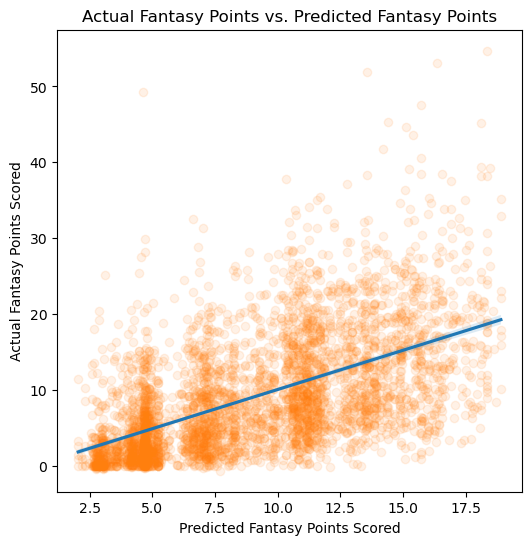

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test,
    x='Prediction',
    y='Fantasy Points',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[1]},
    line_kws={'color': sns.color_palette()[0]},
)

plt.title('Actual Fantasy Points vs. Predicted Fantasy Points')
plt.xlabel('Predicted Fantasy Points Scored')
plt.ylabel('Actual Fantasy Points Scored')

plt.show()

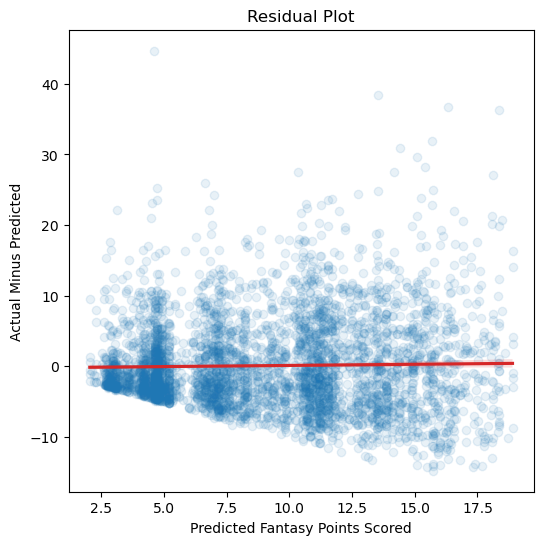

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test.assign(f=(df_test['Fantasy Points'] - df_test['Prediction'])),
    x='Prediction',
    y='f',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[0]},
    line_kws={'color': sns.color_palette()[3]},
)

plt.title('Residual Plot')
plt.xlabel('Predicted Fantasy Points Scored')
plt.ylabel('Actual Minus Predicted')

plt.show()

In [17]:
import shap

explainer = shap.Explainer(mod, feature_names=X_train.columns, seed=22)

shap_values = explainer(pd.concat([i[0] for i in cv_data], ignore_index=True))

shap_values.shape

(6768, 6)

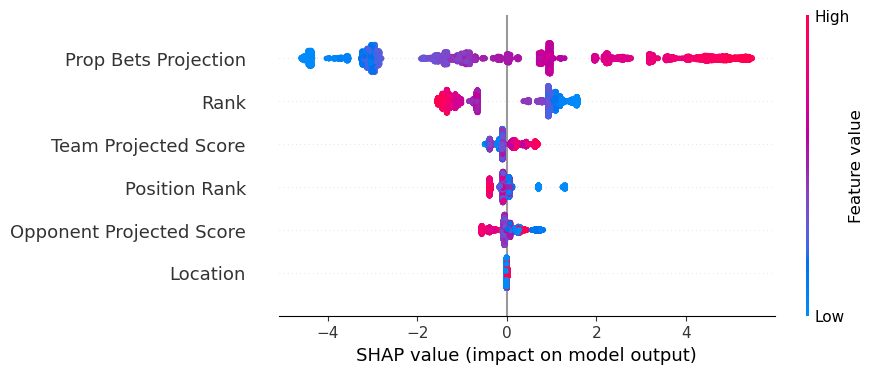

In [18]:
shap.plots.beeswarm(shap_values, max_display=None)